In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib
font = {'family' : 'Arial',
        'size'   : 12}
matplotlib.rc('font', **font)

In [3]:
# Analyze results

subtrees = [3, 4, 6]

tip_annotations = pd.read_csv("../../results/pastml/tip_annotations.txt", sep = '\t')

loci = []
regions = []
rhos = []
subtrees_for_df = []

for subtree in subtrees:
    all_characters = tip_annotations.columns[1:]

    # Get the characters to use (since some subtrees have isolates that are all missing a certain opa locus)
    isolates = pd.read_csv('../../results/subtrees/isolates/subtree_' + str(subtree) + '_isolates.txt', header = None)[0].values
    tip_annotations_subtree = tip_annotations[tip_annotations['strain'].isin(isolates)]

    for character in all_characters:
        loci.append(character.split('_')[0])
        regions.append(character.split('_')[1])
        subtrees_for_df.append(subtree)
        # Check if the output exists (the output would not exist if there were no opas in this locus for this subtree)
        if os.path.exists('../../results/subtrees/pastml/subtree_' + str(subtree) + '/outputs/params.character_' + character + '.method_MPPA.model_F81.tab'):
           # Check if there were multiple character values, then extract the average rate of change
            unique_values = np.unique(tip_annotations_subtree[character].values)
            unique_values = unique_values[~np.isnan(unique_values)]
            if len(unique_values)>1:
                df = pd.read_csv('../../results/subtrees/pastml/subtree_' + str(subtree) + '/outputs/params.character_' + character + '.method_MPPA.model_F81.tab', sep = '\t')
                # rho is the number of state changes per year
                rhos.append(float(df[df['parameter']=='scaling_factor']['value'].values[0]))
            # Otherwise if all the values in the character were the same, then save the rate as zero (think of better way to deal with this - upper bound on rate?)
            else:
                rhos.append(0)
        else:
            rhos.append(np.nan)
      
evolution_rates = pd.DataFrame({'subtree':subtrees_for_df, 'locus':loci, 'Region':regions, 'rho':rhos})

/tmp/ipykernel_1052815/1785377586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolution_rates_4["Region"].replace({"sv":"Semivariable", "hv1":"Hypervariable 1", "hv2":"Hypervariable 2"}, inplace = True)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial

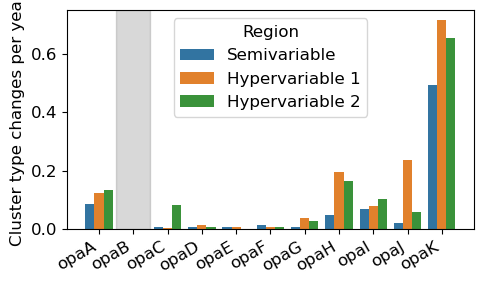

In [5]:
# Just plot subtree 4
evolution_rates_4 = evolution_rates[evolution_rates["subtree"]==4]
evolution_rates_4["Region"].replace({"sv":"Semivariable", "hv1":"Hypervariable 1", "hv2":"Hypervariable 2"}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (5,3))
p = sns.barplot(evolution_rates_4, x="locus", y="rho", hue="Region")
plt.xlabel('')
plt.ylabel('Cluster type changes per year')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

xticks = [tick.get_text() for tick in ax.get_xticklabels()]

# Gray out loci that were mixxing
nan_loci = evolution_rates_4[evolution_rates_4['rho'].isna()]['locus'].unique()
for i, label in enumerate(xticks):
    if label in nan_loci:
        ax.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.3, zorder=0)  # Adjust width as needed

plt.tight_layout()

plt.savefig('../../figures/subtrees/subtrees_rate_of_evolution_subtree_4.png', dpi = 300)
plt.savefig('../../figures/subtrees/subtrees_rate_of_evolution_subtree_4.pdf')

plt.show()

/tmp/ipykernel_1052815/3505037082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolution_rates_4["Region"].replace({"sv":"Semivariable", "hv1":"Hypervariable 1", "hv2":"Hypervariable 2"}, inplace = True)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial

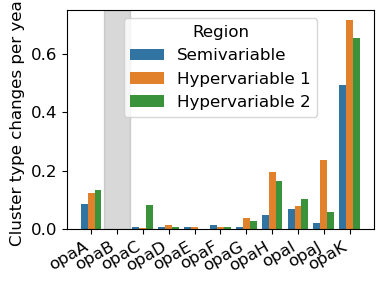

In [6]:
# Different plot aspect ratio

# Just plot subtree 4
evolution_rates_4 = evolution_rates[evolution_rates["subtree"]==4]
evolution_rates_4["Region"].replace({"sv":"Semivariable", "hv1":"Hypervariable 1", "hv2":"Hypervariable 2"}, inplace = True)

fig, ax = plt.subplots(1, 1, figsize = (4,3))
p = sns.barplot(evolution_rates_4, x="locus", y="rho", hue="Region")
plt.xlabel('')
plt.ylabel('Cluster type changes per year')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

xticks = [tick.get_text() for tick in ax.get_xticklabels()]

# Gray out loci that were mixxing
nan_loci = evolution_rates_4[evolution_rates_4['rho'].isna()]['locus'].unique()
for i, label in enumerate(xticks):
    if label in nan_loci:
        ax.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.3, zorder=0)  # Adjust width as needed

plt.tight_layout()

plt.savefig('../../figures/subtrees/subtrees_rate_of_evolution_subtree_4_aspect_4_3.png', dpi = 300)
plt.savefig('../../figures/subtrees/subtrees_rate_of_evolution_subtree_4_aspect_4_3.pdf')

plt.show()